In [1]:
### Imports des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  1- Importation des données


In [2]:
from math import sqrt, log

# chargement des données
breast_DF = pd.read_csv('breast-cancer-wisconsin.data', sep = ',', header = None)

# Renommage des colonnes 
breast_DF.columns = ['ID', 
                    'Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape','Marginal_Adhesion', 
                    'Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses',
                    'Class']

#affichage de quelques tuples
breast_DF.head()



,ID,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
breast_DF.shape

(699, 11)

<h2>Attribute Information:</h2>
-- 1. ID: est l'identifiant d'une instance (Sample code number)<br>
-- 2. Clump_Thickness: Épaisseur de touffe prend des valeurs entre 1 - 10<br>
-- 3. Uniformity_of_Cell_Size: Uniformité de la taille des cellules prend des valeurs entre 1 - 10<br>
-- 4. Uniformity_of_Cell_Shape: Uniformité de la forme des cellules prend des valeurs entre 1 - 10<br>
-- 5. Marginal_Adhesion:Adhérence marginale prend des valeurs entre 1 - 10<br>
-- 6. Single_Epithelial_Cell_Size: Taille de cellule épithéliale unique prend des valeurs entre 1 - 10<br>
-- 7. Bare_Nuclei: Un noyau dans une préparation cytologique qui est pratiquement dépourvu de cytoplasme qui prend des valeurs entre  1 - 10<br>
-- 8. Bland_Chromatin:Chromatine fade qui prend des valeurs  entre 1 - 10<br>
-- 9. Normal_Nucleoli:Normal Nucléoles qui prend des valeurs entre 1 - 10<br>
-- 10. Mitoses: 1 - 10<br>
-- 11. Class: (2 for benign, 4 for malignant)<br>                        

#####  Transformation de '?' vers NaN et detection des valeurs manquantes


In [4]:
breast_DF = breast_DF.replace('?',np.nan)
breast_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_of_Cell_Size      699 non-null    int64 
 3   Uniformity_of_Cell_Shape     699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  683 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


Colonnes avec les valeurs manquantes:
['Bare_Nuclei']


<AxesSubplot:title={'center':'Plot bar de nombres de valeurs manquantes pour chaque attribut'}>

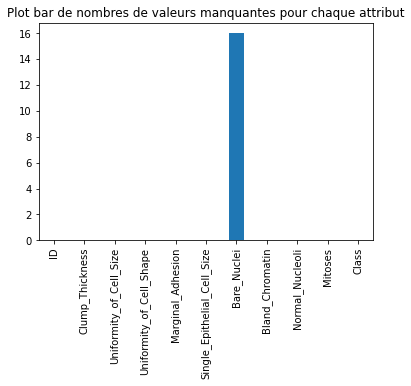

In [5]:
na_count = breast_DF.isnull().sum()
na_columns = list(na_count[na_count>0].index.values)

print("Colonnes avec les valeurs manquantes:")
print(na_columns)

na_count.plot(kind = "bar", title="Plot bar de nombres de valeurs manquantes pour chaque attribut")

D'apres les deux derniers bouts de code, on aperçoit qu'on a des données manquantes sur la colonne "Bare_Nuclei" ou on a 16 valeurs vides manquantes non renseignés, qu'on va par la suite traiter dans une prochaine partie.

#  2- Compréhension des données
<br>
Etude statistique avec des nombres qui vont resumé les proprietés des données qu'on étudie


## 2-1 Mesures de tendance centrale

<AxesSubplot:title={'center':'Plot bar des moyennes pour chaque attribut du dataset sans ID et Class'}>

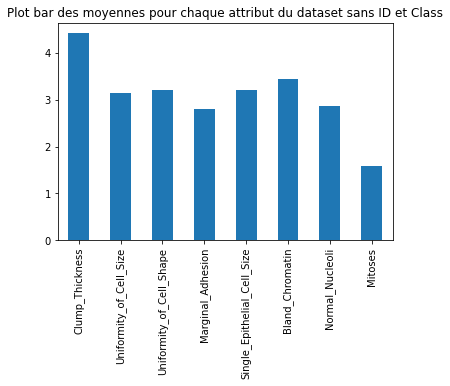

In [6]:
#Mean Weighted arithmetic mean:
means = breast_DF.drop(['ID','Class'], axis=1)
means.mean(skipna=True).plot(kind='bar',title="Plot bar des moyennes pour chaque attribut du dataset sans ID et Class")

<AxesSubplot:title={'center':'Plot bar des moyennes trimmed pour chaque attribut du dataset sans ID et Class'}>

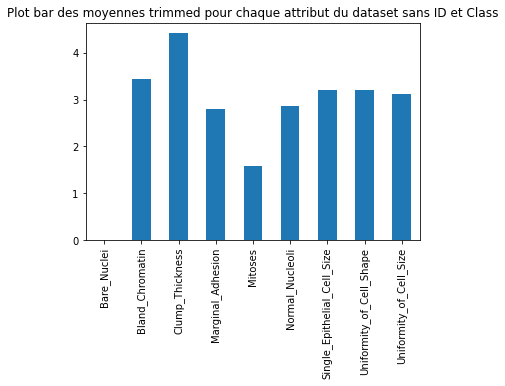

In [7]:
# Trimmed MEAN:
trimmed=(means.sum() - means.min() - means.max()) / (means.notnull().sum() - 2)
trimmed.plot(kind='bar',title="Plot bar des moyennes trimmed pour chaque attribut du dataset sans ID et Class")

Clump_Thickness                4.0
Uniformity_of_Cell_Size        1.0
Uniformity_of_Cell_Shape       1.0
Marginal_Adhesion              1.0
Single_Epithelial_Cell_Size    2.0
Bare_Nuclei                    1.0
Bland_Chromatin                3.0
Normal_Nucleoli                1.0
Mitoses                        1.0
dtype: float64

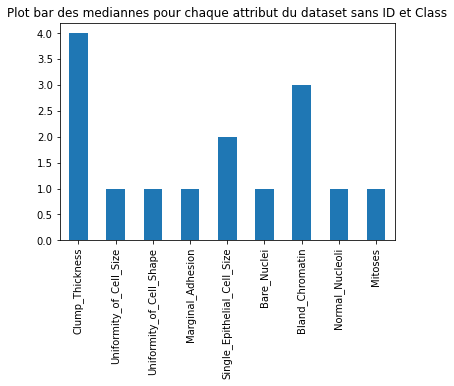

In [8]:
#Median
means.median().plot(kind='bar',title="Plot bar des mediannes pour chaque attribut du dataset sans ID et Class")
means.median()


,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,1,1,1,1,2,1,2,1,1


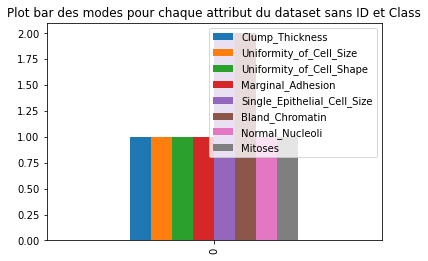

In [9]:
#Mode: Le mode d'un ensemble de valeurs est la valeur qui apparaît le plus souvent. Il peut s'agir de plusieurs valeurs.
means.mode(dropna=True).plot(kind='bar',title="Plot bar des modes pour chaque attribut du dataset sans ID et Class")
means.mode(dropna=True)


In [10]:
#MAX 
print("Max de chaque attribut:")
means.max()

Max de chaque attribut:


Clump_Thickness                10
Uniformity_of_Cell_Size        10
Uniformity_of_Cell_Shape       10
Marginal_Adhesion              10
Single_Epithelial_Cell_Size    10
Bland_Chromatin                10
Normal_Nucleoli                10
Mitoses                        10
dtype: int64

In [11]:
#Min
print("Min de chaque attribut:")
means.min()

Min de chaque attribut:


Clump_Thickness                1
Uniformity_of_Cell_Size        1
Uniformity_of_Cell_Shape       1
Marginal_Adhesion              1
Single_Epithelial_Cell_Size    1
Bland_Chromatin                1
Normal_Nucleoli                1
Mitoses                        1
dtype: int64

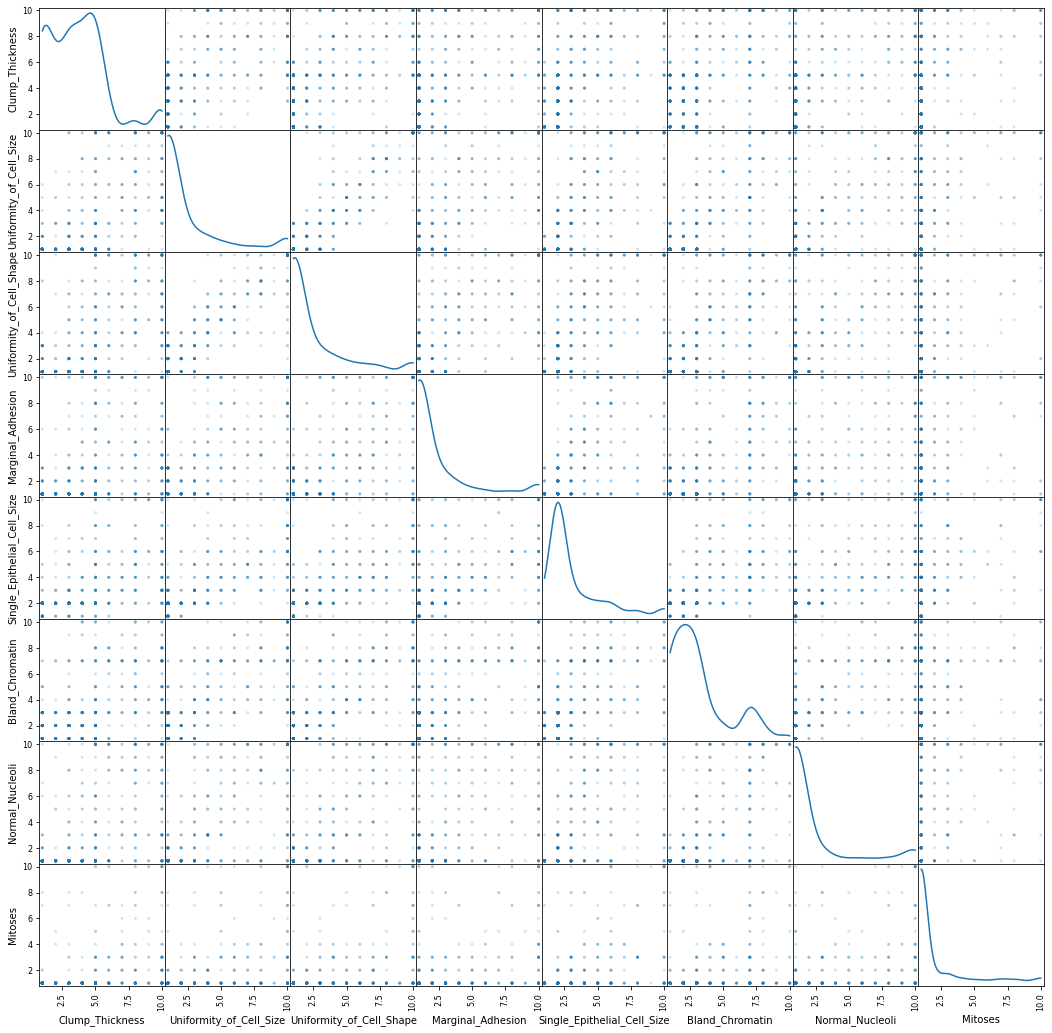

In [12]:
#Distribution Gaussienne
from pandas.plotting import scatter_matrix

scatter_matrix(means, alpha=0.2, figsize=(18, 18), diagonal='kde')
#plt.savefig("Distribution des attributs.png") 
plt.show()


A partir de cette matrix scatter plot, on aperçoit que les attributs suivants ne sont pas en distrubution gaussienne, par la suite il faut les transformer, on verra çà dans une prochaine étape dans la data transformation.

Nombre de gens atteintes de cancer breast Disease: 458
Nombre de gens non atteintes de cancer breast Disease: 241


<AxesSubplot:title={'center':'Plot bar de nombres de Malade et non Malade de breast cancer'}>

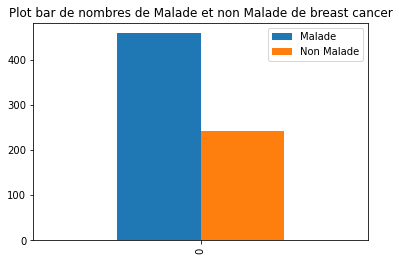

In [13]:
# Distribution of Breast cancer disease
# Valeur de Class 2= non malade sinon 4=  malade
malade = (breast_DF['Class'] == 2)
print("Nombre de gens atteintes de cancer breast Disease:",malade.sum())
nonMalade = (breast_DF['Class'] == 4)
print("Nombre de gens non atteintes de cancer breast Disease:",nonMalade.sum())

d = {'Malade': [malade.sum()], 'Non Malade': [nonMalade.sum()]}
df = pd.DataFrame(data=d)

df.plot(kind = "bar", title="Plot bar de nombres de Malade et non Malade de breast cancer")


On apperçoit à partir de ce petit test et de ce plot, que les classes sont imbalanced; ça implique que le dataset est imbalanced, et qu'on a besoin de traiter ce type de probleme qu'on vas voir dans les prochaines étapes.

## 2-2 Mesures de la dispersion des données

<AxesSubplot:>

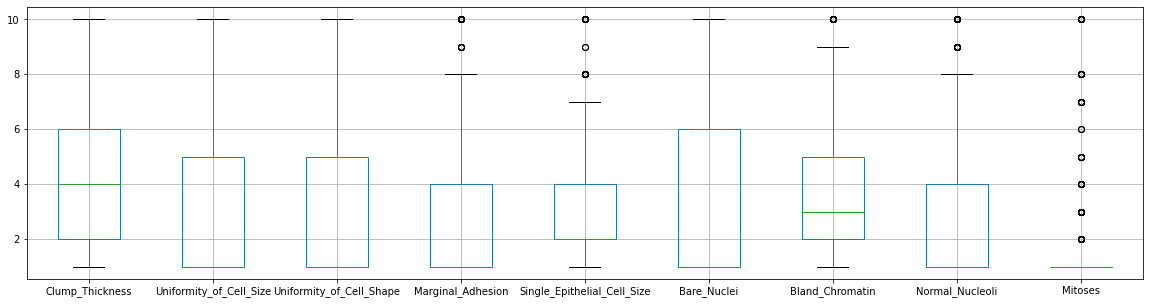

In [14]:
#Quartiles et outliers
means['Bare_Nuclei'] = pd.to_numeric(means['Bare_Nuclei'])
means.boxplot(figsize=(20,5))
#plt.savefig("Boxplot des attributs.png") 



A partir de ce plot on apperçoit qu'ils ne y'a pas de vrai outliers meme ci qu'on a quelques données qui appartiennent pas aux differents Boxplots, et celà revient au faite que les instances prennent des valeurs de 1 à 10 pour les valeurs attributs de chaque row, donc celà nous évite de travailler sur les problemes outliers.

In [15]:
#Quantiles
#Q1 et Q2 et Q3
print("Les quantiles du dataset")
x = means.quantile([0.25,0.5,0.75])
x

Les quantiles du dataset


,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0.25,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
0.50,4.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
0.75,6.0,5.0,5.0,4.0,4.0,6.0,5.0,4.0,1.0


<AxesSubplot:title={'center':'Graphe affichant les differents quantiles des attributs'}>

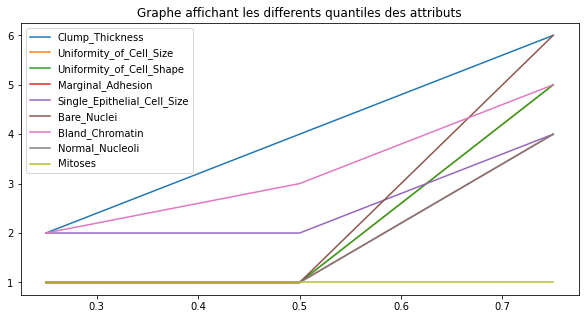

In [16]:
x.plot(figsize=(10,5),title="Graphe affichant les differents quantiles des attributs")

In [17]:
#Interquartiles
def find_iqr(x):
  return np.subtract(*np.percentile(x, [75, 25]))

print("Les interquartiles du dataset sont:")
means.apply(find_iqr)

Les interquartiles du dataset sont:


Clump_Thickness                4.0
Uniformity_of_Cell_Size        4.0
Uniformity_of_Cell_Shape       4.0
Marginal_Adhesion              3.0
Single_Epithelial_Cell_Size    2.0
Bare_Nuclei                    NaN
Bland_Chromatin                3.0
Normal_Nucleoli                3.0
Mitoses                        0.0
dtype: float64

In [18]:
#Variance and standard deviation 
#Variance
print("La variance des attributs du data set")
print(means.var())
print()
#Standard deviation
print("La deviation standard des attributs du data set")
print(means.std())


La variance des attributs du data set
Clump_Thickness                 7.928395
Uniformity_of_Cell_Size         9.311403
Uniformity_of_Cell_Shape        8.832265
Marginal_Adhesion               8.153191
Single_Epithelial_Cell_Size     4.903124
Bare_Nuclei                    13.277695
Bland_Chromatin                 5.945620
Normal_Nucleoli                 9.324680
Mitoses                         2.941492
dtype: float64

La deviation standard des attributs du data set
Clump_Thickness                2.815741
Uniformity_of_Cell_Size        3.051459
Uniformity_of_Cell_Shape       2.971913
Marginal_Adhesion              2.855379
Single_Epithelial_Cell_Size    2.214300
Bare_Nuclei                    3.643857
Bland_Chromatin                2.438364
Normal_Nucleoli                3.053634
Mitoses                        1.715078
dtype: float64


#  3-  Pre-processing des données
## 3-1 Data cleaning
 

Comme c'était le cas à partir de la partie de data understanding (section 2), on a été confronté à beaucoup de problemes, notamment le probleme de des valeurs manquantes sur la colonne "Bare_Nuclei"  

In [19]:
#Missing values problem resolution 
missing_DF = breast_DF.drop(['ID'], axis=1)


print('Nombre de valeurs manquantes pour chaque attribut de dataset:')
for colonne in missing_DF.columns:
    print('\t%s: %d' % (colonne,missing_DF[colonne].isna().sum()))
  

Nombre de valeurs manquantes pour chaque attribut de dataset:
	Clump_Thickness: 0
	Uniformity_of_Cell_Size: 0
	Uniformity_of_Cell_Shape: 0
	Marginal_Adhesion: 0
	Single_Epithelial_Cell_Size: 0
	Bare_Nuclei: 16
	Bland_Chromatin: 0
	Normal_Nucleoli: 0
	Mitoses: 0
	Class: 0


In [20]:
#Before imputation
missing_DF

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [21]:
import numpy as np
from numpy import isnan
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(missing_DF)
# transform the dataset
Xtrans = imputer.transform(missing_DF)
# print total missing
print('Missing instances of the dataset: %d' % sum(isnan(Xtrans).flatten()))

no_missing_breast_DF = pd.DataFrame(Xtrans, columns = [ 
                    'Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape','Marginal_Adhesion', 
                    'Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class'])

#after imputation
no_missing_breast_DF

Missing instances of the dataset: 0


,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4.0
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4.0


## 3-2 Data Integration
Etant donné qu'on travaille sur un seul dataset, y'a pas besoin de faire cette étape

## 3-3 Data Transformation
Comme c'était le cas à partir de la partie de data understanding (section 2), on a été confronté à beaucoup de problemes, notamment sur la non distribution des données en loi gaussienne, aussi le probleme de imbalanced data car les labels classification ne sont pas equally representé.


2.0    458
4.0    458
Name: Class, dtype: int64
Bar plot du dataset balanced(label=Class)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

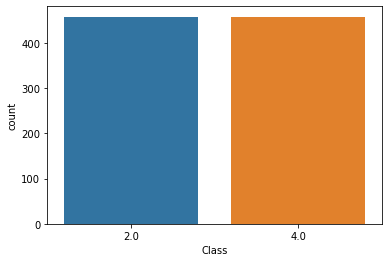

In [22]:
#Imbalanced Data
#Pour ce probleme on vas utiliser Oversampling
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = no_missing_breast_DF[(no_missing_breast_DF['Class'] == 2)] 
df_minority = no_missing_breast_DF[(no_missing_breast_DF['Class'] == 4)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 458, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
breast_DF_balanced = pd.concat([df_minority_upsampled, df_majority])
print(breast_DF_balanced['Class'].value_counts())

print("Bar plot du dataset balanced(label=Class)")
sns.countplot(breast_DF_balanced['Class'])

In [23]:
#Gaussian Distribution 
#LOG transformations

print("Le Skew de chaque colonne avant la transformation:")
breast_DF_balanced.skew()

Le Skew de chaque colonne avant la transformation:


Clump_Thickness                0.349264
Uniformity_of_Cell_Size        0.809455
Uniformity_of_Cell_Shape       0.727808
Marginal_Adhesion              0.985962
Single_Epithelial_Cell_Size    1.317916
Bare_Nuclei                    0.450181
Bland_Chromatin                0.733031
Normal_Nucleoli                0.981215
Mitoses                        2.829435
Class                          0.000000
dtype: float64

Text(0.5, 1.0, 'Distribution des données de chaque colonne avant transformation')

<Figure size 432x288 with 0 Axes>

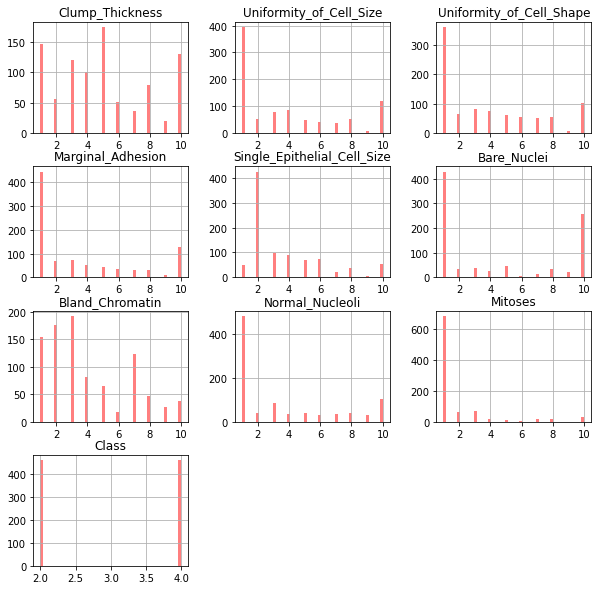

In [24]:
plt.figure()
breast_DF_balanced.hist(color="r", alpha=0.5, bins=50, figsize=(10,10))
plt.title("Distribution des données de chaque colonne avant transformation")

In [25]:
#LOG transformations
breast_DF_balanced["Clump_Thickness"] = breast_DF_balanced["Clump_Thickness"].map(lambda x: log(x))
breast_DF_balanced["Uniformity_of_Cell_Size"] = breast_DF_balanced["Uniformity_of_Cell_Size"].map(lambda x: log(x))
breast_DF_balanced["Uniformity_of_Cell_Shape"] = breast_DF_balanced["Uniformity_of_Cell_Shape"].map(lambda x: log(x))
breast_DF_balanced["Marginal_Adhesion"] = breast_DF_balanced["Marginal_Adhesion"].map(lambda x: log(x))
breast_DF_balanced["Single_Epithelial_Cell_Size"] = breast_DF_balanced["Single_Epithelial_Cell_Size"].map(lambda x: log(x))
breast_DF_balanced["Bare_Nuclei"] = breast_DF_balanced["Bare_Nuclei"].map(lambda x: log(x))
breast_DF_balanced["Bland_Chromatin"] = breast_DF_balanced["Bland_Chromatin"].map(lambda x: log(x))
breast_DF_balanced["Normal_Nucleoli"] = breast_DF_balanced["Normal_Nucleoli"].map(lambda x: log(x))
breast_DF_balanced["Mitoses"] = breast_DF_balanced["Mitoses"].map(lambda x: log(x))

print("Le Skew de chaque colonne apres la transformation:")
breast_DF_balanced.skew()

Le Skew de chaque colonne apres la transformation:


Clump_Thickness               -0.670453
Uniformity_of_Cell_Size        0.204897
Uniformity_of_Cell_Shape       0.092207
Marginal_Adhesion              0.444980
Single_Epithelial_Cell_Size    0.423389
Bare_Nuclei                    0.180759
Bland_Chromatin               -0.180253
Normal_Nucleoli                0.506527
Mitoses                        1.844444
Class                          0.000000
dtype: float64

Text(0.5, 1.0, 'Distribution des données de chaque colonne apres transformation')

<Figure size 432x288 with 0 Axes>

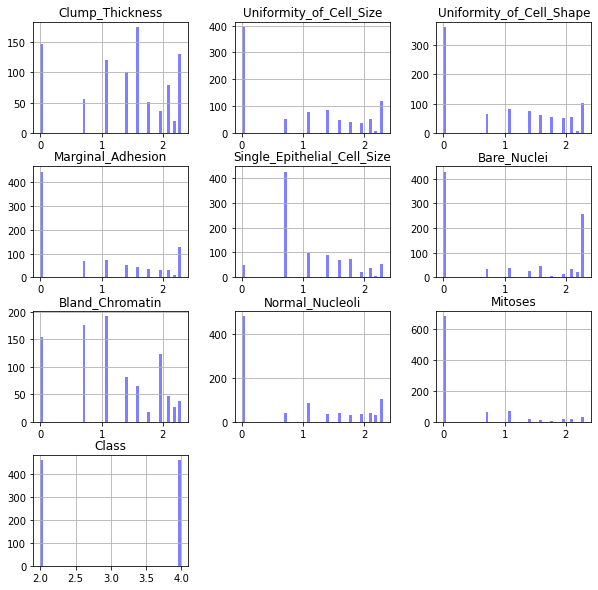

In [26]:
plt.figure()

breast_DF_balanced.hist(color="b", alpha=0.5, bins=50, figsize=(10,10))
plt.title("Distribution des données de chaque colonne apres transformation")


## 3-4 Data Reduction


C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


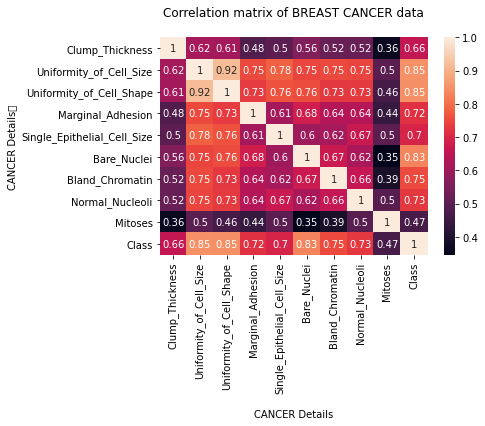

In [27]:
hm = sns.heatmap(breast_DF_balanced.corr(), annot = True)
hm.set(xlabel='\nCANCER Details', ylabel='CANCER Details\t', title = "Correlation matrix of BREAST CANCER data\n")

plt.show()

A partir de cette matrice de correlation, on apperçoit que les deux colonnes Uniformity_of_Cell_Size et Uniformity_of_Cell_Shape sont fortement corrélés 0.92, et qu'on peut retirer une des deux colonnes. Mais, puisque y'en a pas trop de données et de colonnes on peu aussi la garder.

In [28]:
breast_DF_balanced = breast_DF_balanced.drop(['Uniformity_of_Cell_Size'], axis=1)

On va retirer la colonne Uniformity_of_Cell_Size, car apres avoir supprimer cette colonne, le modele repond mieux avec une mielleur V-Measure de 0.8138934242085933(avec Kmeans) à 0.8261869877795835(avec Kmeans).<br>
Pour ces raisons de performance du modele on vas la supprimer.

## 3-5 Data Discretization
On a pas besoin de faire une discretization, car une Discretization c'est pour  transformer des variables en variable catégoriques.

#  4-   Measure the quality of the clusters methods
Il y'a deux types de cas qu'on peut ce retrouvé à travailler avec afin de choisir les bonnes métriques pour vérifier la qualité des clusters.<br>
Pour celà, on a:<br>
Les datasets qui viennent avec leurs étiquettes(initially predicted labels).<br>
Les datasets qui viennent sans leurs étiquettes(no initially predicted labels), qu'on prédit par la suite avec algorithms de clustering.<br>
Nous dans notre cas sur le dataset BREAST CANCER, on se retrouve avec un dataset contenant déja des labeles initiaux, ce qui implique par la suite qu'on doit utiliser des métriques du qualité qui prennent en charge cette avantage d'avoir des labels initiaux, et de pouvoir les comparer avec les predictions ffaites par la suite. Parmi ces metriques on a:<br>
<h2>4-1 Rand Index</h2><br>
Compte tenu de la connaissance des affectations de classe de vérité terrain labels_true et de nos affectations d'algorithme de clustering des mêmes échantillons labels_pred , l' indice de Rand (ajusté ou non) est une fonction qui mesure la similitude des deux affectations, en ignorant les permutations.
<br>
<h2>4-2 Mutual information based scores</h2><br>
Compte tenu de la connaissance des affectations de classe de vérité terrain labels_true et de nos affectations d'algorithme de clustering des mêmes échantillons labels_pred , l' information mutuelle est une fonction qui mesure l' accord des deux affectations, en ignorant les permutations. Deux versions normalisées différentes de cette mesure sont disponibles, les informations mutuelles normalisées (NMI) et les informations mutuelles ajustées (AMI) . Le NMI est souvent utilisé dans la littérature, tandis que l'AMI a été proposé plus récemment et est normalisé contre le hasard.
<br>
<h2>4-3 Homogeinity, completeness and V-Measure</h2><br>
En connaissant les affectations de classe de la vérité du sol des échantillons,il est possible de définir une métrique intuitive en utilisant l'analyse de l'entropie conditionnelle.<br>

En particulier,Rosenberg et Hirschberg (2007)définissent les deux objectifs souhaitables suivants pour toute affectation de cluster :<br>

homogénéité : chaque cluster ne contient que les membres d'une même classe.
complétude : tous les membres d'une classe donnée sont affectés au même cluster.
Nous pouvons transformer ces concepts en scores homogeneity_score et completeness_score . Les deux sont limités en-dessous par 0,0 et au-dessus par 1,0 (plus c'est mieux).


#  5-  The TWO Clustering algorithms
Apres avoir préparer les données dans la partie de preprocessing de données, on va maintenant implimenté deux algorithms de clustering pour faire de forecasting
## 5-1 KMeans


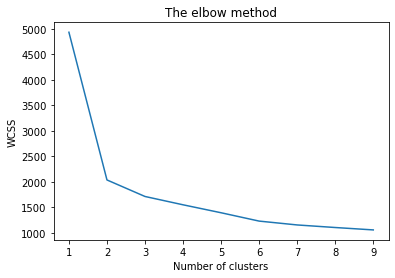

In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = breast_DF_balanced.drop(['Class'], axis=1)
y = breast_DF_balanced['Class']


#Finding the optimum number of clusters for k-means classification:La méthode du coude 
#nous permet de choisir la quantité optimale de clusters pour la classification. 
#Bien que nous sachions déjà que la réponse est 2, il est toujours intéressant de le voir.
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

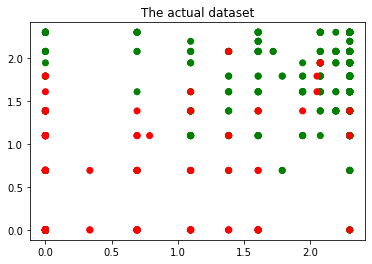

In [30]:
#Applying kmeans to the dataset / Creating the kmeans classifier
#A partir de elbow method on prend K=2

kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit(x)

y = y.astype(int)
y = y.replace(4,1)
y = y.replace(2,0)

import numpy as np
color =np.array(['red','green'])
#adding the colors
plt.scatter(x=breast_DF_balanced.Bare_Nuclei#Uniformity_of_Cell_Size,
            ,y=breast_DF_balanced.Uniformity_of_Cell_Shape,c=color[y])
plt.title("The actual dataset")
plt.show()


Text(0.5, 1.0, 'The dataset post clustering')

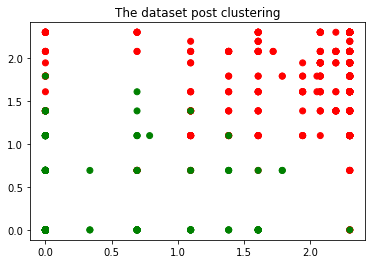

In [31]:
#After the clustering
#adding the colors
color2=np.array(['green','red'])
plt.scatter(x=breast_DF_balanced.Bare_Nuclei#Uniformity_of_Cell_Size
            ,y=breast_DF_balanced.Uniformity_of_Cell_Shape,c=color2[y_kmeans.labels_])
plt.title("The dataset post clustering")

In [32]:
from sklearn import metrics
labels_true = y
labels_pred = y_kmeans.labels_
print("Homogenity du clustering", metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness du clustering",metrics.completeness_score(labels_true, labels_pred))
print('Leur moyenne harmonique appelée V-mesure est calculée par v_measure_score :',metrics.v_measure_score(labels_true, labels_pred))


Homogenity du clustering 0.8261358458787105
Completeness du clustering 0.8262381360127224
Leur moyenne harmonique appelée V-mesure est calculée par v_measure_score : 0.8261869877795834


## 5-2 Gaussian Mixture with Expectation Maximization (EM) Clustering



Text(0.5, 1.0, 'Gaussian Mix-EM clustering plot')

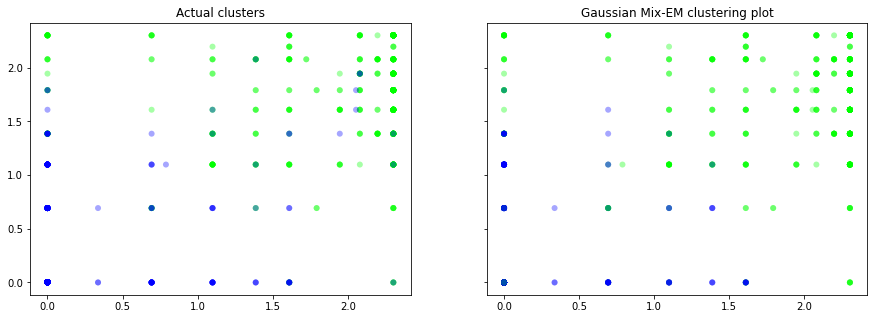

In [33]:
# Gaussian Mixture with Expectation Maximization (EM) Clustering
# Uses all specified components to fit.

from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, covariance_type="full")
gm_pred = gm.fit_predict(x)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,5))

ax1.scatter(x=breast_DF_balanced.Bare_Nuclei,y=breast_DF_balanced.Uniformity_of_Cell_Shape, c=y, cmap="brg", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(x=breast_DF_balanced.Bare_Nuclei,y=breast_DF_balanced.Uniformity_of_Cell_Shape, c=gm_pred, cmap="brg", edgecolor="None", alpha=0.35)
ax2.set_title("Gaussian Mix-EM clustering plot")

In [34]:
from sklearn import metrics
labels_true = y
labels_pred = gm_pred
print("Homogenity du clustering", metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness du clustering",metrics.completeness_score(labels_true, labels_pred))
print('Leur moyenne harmonique appelée V-mesure est calculée par v_measure_score :',metrics.v_measure_score(labels_true, labels_pred))

Homogenity du clustering 0.757030615922175
Completeness du clustering 0.7604231326039544
Leur moyenne harmonique appelée V-mesure est calculée par v_measure_score : 0.758723081999397


# 6- Kmeans VS Gaussian Mixture with Expectation Maximization (EM) Clustering
On va comparer  dans cette section la qualité des deux algorithms en utilisant les trois differentes metrics (meme ci une est largement suffisante), mais c'est pour voir c'est y'a vraiment des grands changements avec ces métrics.<br>
Aussi, on va utilisé silhouette qui est une métrique qu'on a pas décrit la dessus, mais c'est une métrique pour le cas ou on connais pas les labels initiaux de dataset.

In [35]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd

algorithms = []
algorithms.append(kmeans)
algorithms.append(gm)

data = []
for algo in algorithms:
    algo.fit(x)
    if(algo == kmeans):
        data.append(({
            'ARI': metrics.adjusted_rand_score(y, algo.labels_),
            'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_,
                                                     average_method='arithmetic'),
            'Homogenity': metrics.homogeneity_score(y, algo.labels_),
            'Completeness': metrics.completeness_score(y, algo.labels_),
            'V-measure': metrics.v_measure_score(y, algo.labels_),
            'Silhouette': metrics.silhouette_score(x, algo.labels_)}))
    else:
            data.append(({
            'ARI': metrics.adjusted_rand_score(y, algo.fit_predict(x)),
            'AMI': metrics.adjusted_mutual_info_score(y, algo.fit_predict(x),
                                                     average_method='arithmetic'),
            'Homogenity': metrics.homogeneity_score(y, algo.fit_predict(x)),
            'Completeness': metrics.completeness_score(y, algo.fit_predict(x)),
            'V-measure': metrics.v_measure_score(y, algo.fit_predict(x)),
            'Silhouette': metrics.silhouette_score(x, algo.fit_predict(x))}))
        
results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Gaussian Mixture with EM'])

results


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.897831,0.826050,0.826136,0.826238,0.826187,0.506151
Gaussian Mixture with EM,0.824813,0.758532,0.757031,0.760423,0.758723,0.473224


A partir des résultats obtenus, on peu conclure que le meilleure model pour cette éxperience sur le Breast Cancer Dataset est KMeans. Ou on  peu voir, il a legerement le dessus sur GM sur toutes les mésures de qualité vu et éffectué sur ces deux modeles.<br>
Celà conclut, qu'on doit prendre KMeans que GM(EM), car il donne des meilleures résultats que çà soit avec les labels initiaux de dataset ou sans, il est toujours devant plus précis que l'autre algorithme de clustering 